In [1]:
from google.colab import drive

In [1]:
!pip freeze > requirements.txt

In [2]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/Colab Notebooks/training_loan_data.csv'

In [4]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv(file_path,  header=1)

In [6]:
print(data.columns)

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'emp_length',
       'home_ownership', 'annual_inc', 'desc', 'purpose', 'percent_bc_gt_75',
       'bc_util', 'dti', 'inq_last_6mths', 'mths_since_recent_inq',
       'revol_util', 'total_bc_limit', 'mths_since_last_major_derog',
       'tot_hi_cred_lim', 'tot_cur_bal', 'application_approved_flag',
       'internal_score', 'bad_flag'],
      dtype='object')


In [7]:
data.head()

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,...,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,...,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,...,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0


In [8]:
num_records = data.shape[0]
print(f"Number of records: {num_records}")

Number of records: 199121


In [9]:
num_fields = data.shape[1]
print(f"Number of fields: {num_fields}")

Number of fields: 23


In [10]:
print(data.dtypes)

id                               int64
member_id                      float64
loan_amnt                        int64
term                            object
int_rate                        object
emp_length                      object
home_ownership                  object
annual_inc                     float64
desc                            object
purpose                         object
percent_bc_gt_75               float64
bc_util                        float64
dti                            float64
inq_last_6mths                 float64
mths_since_recent_inq          float64
revol_util                      object
total_bc_limit                 float64
mths_since_last_major_derog    float64
tot_hi_cred_lim                float64
tot_cur_bal                    float64
application_approved_flag        int64
internal_score                   int64
bad_flag                       float64
dtype: object


In [11]:
data.replace('', np.nan, inplace=True) ##replace missing with NaN then check how many missing values in each column

In [12]:
null_counts = data.isnull().sum()
print("Count of null values for each field:")
print(null_counts)

Count of null values for each field:
id                                  0
member_id                        9664
loan_amnt                           0
term                             9664
int_rate                         9664
emp_length                      17590
home_ownership                   9664
annual_inc                       9664
desc                           117117
purpose                          9664
percent_bc_gt_75                18702
bc_util                         18788
dti                              9664
inq_last_6mths                   9664
mths_since_recent_inq           37649
revol_util                       9791
total_bc_limit                  17159
mths_since_last_major_derog    166372
tot_hi_cred_lim                 17159
tot_cur_bal                     37405
application_approved_flag           0
internal_score                      0
bad_flag                         9664
dtype: int64


Handling Missing values

In [13]:
miscol = ['desc', 'member_id', 'mths_since_last_major_derog']  ##drop columns with most empty
data.drop(miscol, axis=1, inplace=True)


In [14]:
data = data.dropna(subset=['bad_flag'])
# data.head()

In [15]:
null_counts = data.isnull().sum()
print("Count of null values for each field:")
print(null_counts)

Count of null values for each field:
id                               0
loan_amnt                        0
term                             0
int_rate                         0
emp_length                    7926
home_ownership                   0
annual_inc                       0
purpose                          0
percent_bc_gt_75              9038
bc_util                       9124
dti                              0
inq_last_6mths                   0
mths_since_recent_inq        27985
revol_util                     127
total_bc_limit                7495
tot_hi_cred_lim               7495
tot_cur_bal                  27741
application_approved_flag        0
internal_score                   0
bad_flag                         0
dtype: int64


In [16]:
data['term'] = data['term'].str.extract('(\d+)').astype(float)

In [17]:
# Map '10+ years' to 10, '< 1 year' to 0, and extract numeric years from the rest
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(float)
data['emp_length'] = data['emp_length'].fillna(0)  # Assume missing values as 0 (less than a year)


In [18]:
percentage_columns = ['int_rate', 'revol_util']
for col in percentage_columns:
    if col in data.columns and data[col].dtype == 'object':
        data[col] = data[col].str.replace('%', '').astype(float) / 100

In [19]:
columns_to_impute = [
     'revol_util',  'percent_bc_gt_75',
    'bc_util',  'total_bc_limit', 'tot_hi_cred_lim', 'tot_cur_bal'
]

# Replace missing values with the median for each column
for col in columns_to_impute:
    data[col] = data[col].fillna(data[col].median())


In [20]:
data['mths_since_recent_inq'] = data['mths_since_recent_inq'].fillna(0)

In [21]:
data["id"] = data["id"].astype("str")


The dataset has been cleaned

In [22]:
null_counts = data.isnull().sum()
print("Count of null values for each field:")
print(null_counts)

Count of null values for each field:
id                           0
loan_amnt                    0
term                         0
int_rate                     0
emp_length                   0
home_ownership               0
annual_inc                   0
purpose                      0
percent_bc_gt_75             0
bc_util                      0
dti                          0
inq_last_6mths               0
mths_since_recent_inq        0
revol_util                   0
total_bc_limit               0
tot_hi_cred_lim              0
tot_cur_bal                  0
application_approved_flag    0
internal_score               0
bad_flag                     0
dtype: int64


In [23]:
print(data.dtypes)

id                            object
loan_amnt                      int64
term                         float64
int_rate                     float64
emp_length                   float64
home_ownership                object
annual_inc                   float64
purpose                       object
percent_bc_gt_75             float64
bc_util                      float64
dti                          float64
inq_last_6mths               float64
mths_since_recent_inq        float64
revol_util                   float64
total_bc_limit               float64
tot_hi_cred_lim              float64
tot_cur_bal                  float64
application_approved_flag      int64
internal_score                 int64
bad_flag                     float64
dtype: object


EAD

In [24]:
display(data.describe())## neumerical colunns stats

,loan_amnt,term,int_rate,emp_length,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
count,189457.000000,189457.000000,189457.000000,189457.000000,1.894570e+05,189457.000000,189457.000000,189457.000000,189457.000000,189457.000000,189457.000000,189457.000000,189457.000000,1.894570e+05,189457.0,189457.000000,189457.000000
mean,14353.641987,41.657051,0.142827,5.907546,7.224330e+04,53.405224,67.098955,17.061084,0.803549,5.960593,0.583917,20020.282687,20016.810116,1.290396e+05,1.0,187.629520,0.069293
std,8112.121438,10.186636,0.044381,3.593983,5.180483e+04,33.338047,25.500808,7.596941,1.032936,5.968414,0.229995,18534.058373,18595.217308,1.406918e+05,0.0,105.444113,0.253952
min,1000.000000,36.000000,0.060000,0.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.0,14.000000,0.000000
25%,8000.000000,36.000000,0.111400,2.000000,4.500000e+04,28.600000,50.900000,11.340000,0.000000,1.000000,0.425000,8100.000000,8073.189819,3.199800e+04,1.0,105.000000,0.000000
50%,12175.000000,36.000000,0.140900,6.000000,6.200000e+04,50.000000,72.200000,16.780000,0.000000,4.000000,0.605000,14700.000000,14637.479485,8.076050e+04,1.0,159.000000,0.000000
75%,20000.000000,36.000000,0.172700,10.000000,8.700000e+04,80.000000,88.300000,22.580000,1.000000,9.000000,0.766000,25700.000000,25703.471630,1.855840e+05,1.0,261.000000,0.000000
max,35000.000000,60.000000,0.260600,10.000000,7.141778e+06,100.000000,339.600000,34.990000,8.000000,24.000000,1.404000,522210.000000,520643.298200,8.000078e+06,1.0,456.000000,1.000000


In [25]:
data.describe(include=['object']) ##categorical columns stas

,id,home_ownership,purpose
count,189457,189457,189457
unique,188123,5,13
top,10049428,MORTGAGE,debt_consolidation
freq,2,97647,112259


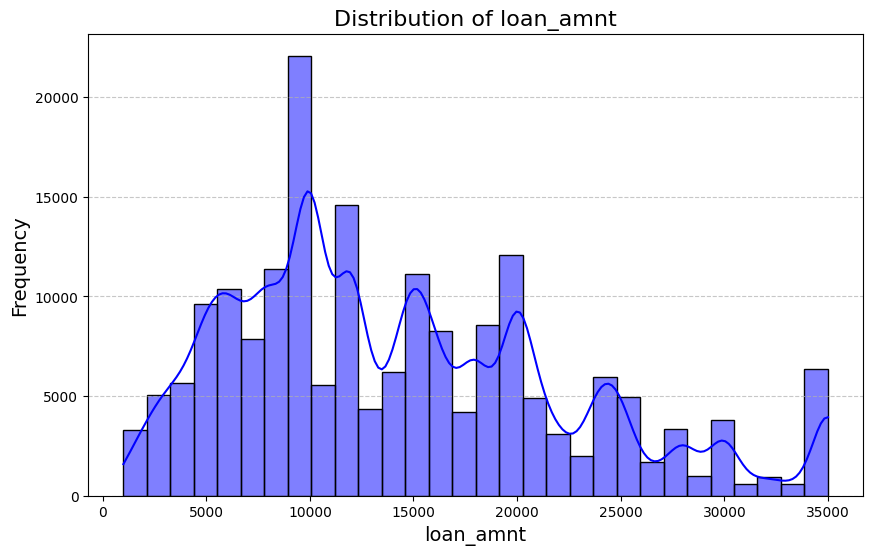

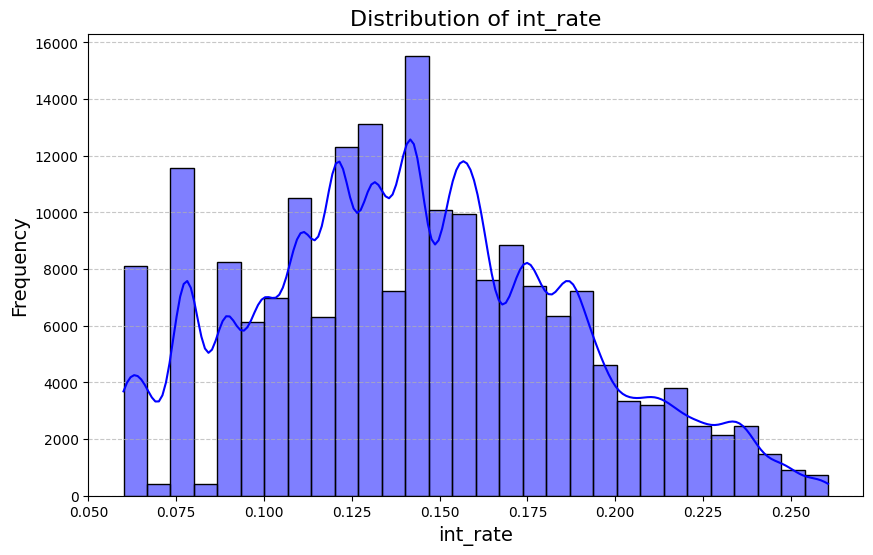

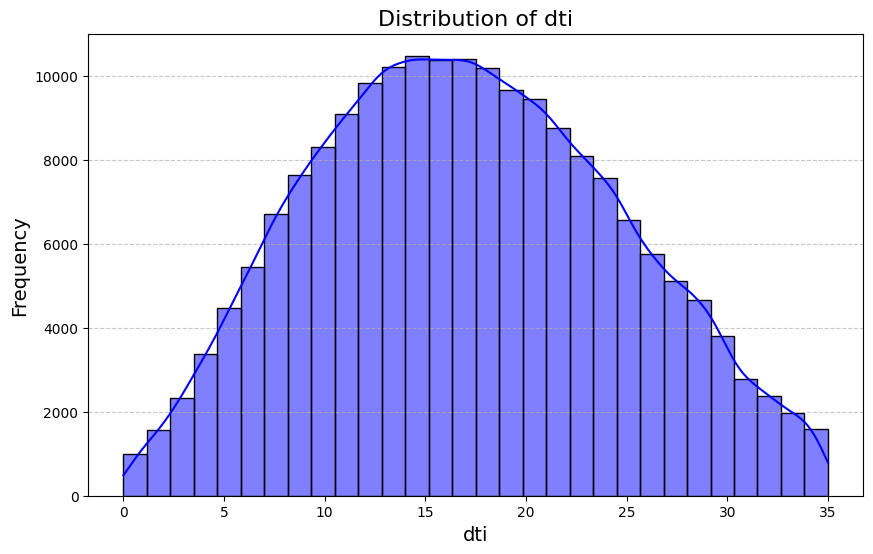

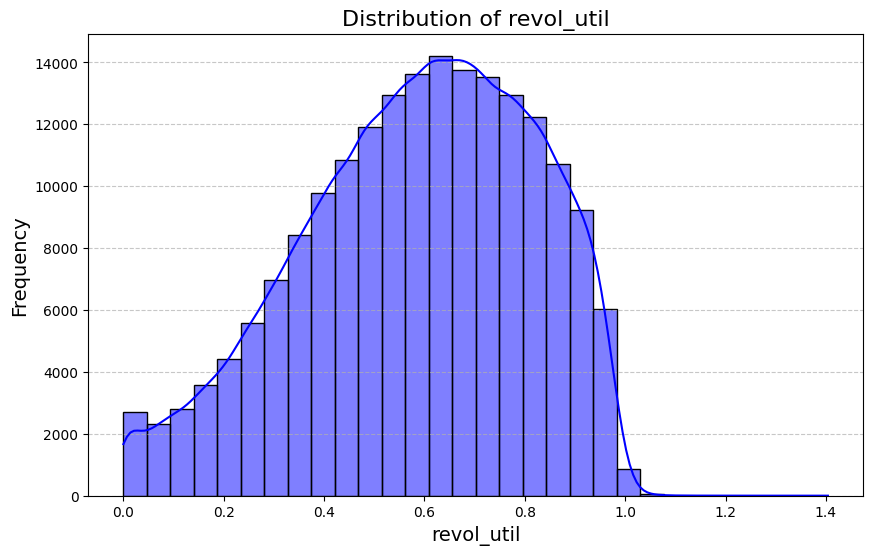

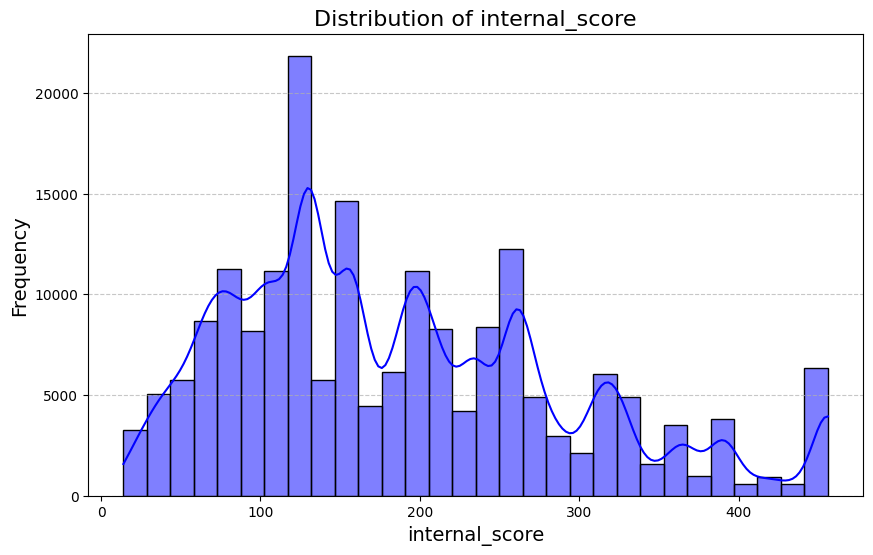

In [26]:
columns_to_visualize = ['loan_amnt', 'int_rate', 'dti', 'revol_util', 'internal_score']
for column in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


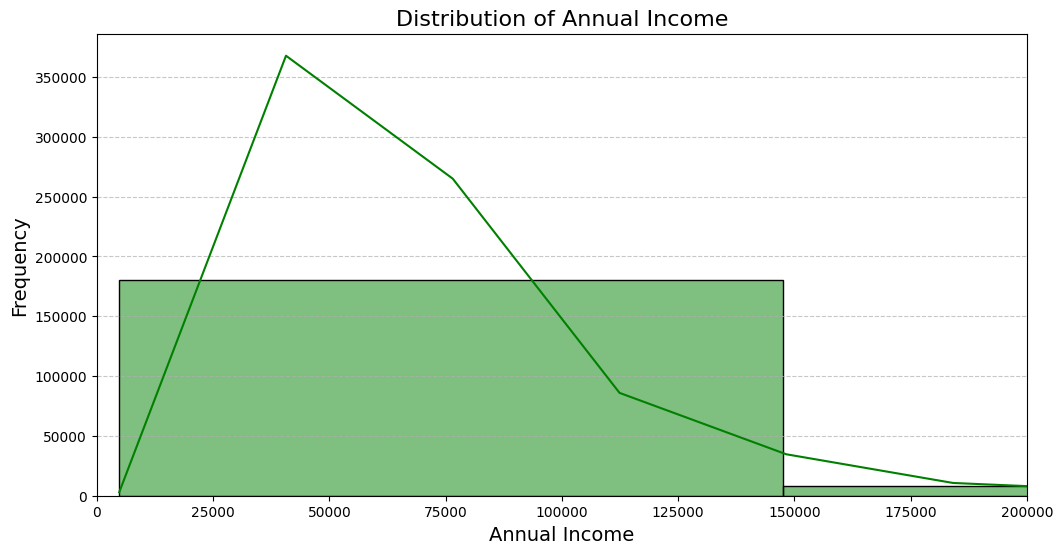

In [27]:
plt.figure(figsize=(12, 6))

# Adjusted distribution plot
sns.histplot(data=data, x='annual_inc', kde=True, bins=50, color='green', log_scale=(False, False))
plt.title('Distribution of Annual Income', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0, 200000)  # Adjust range if necessary; modify as per the dataset scale
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

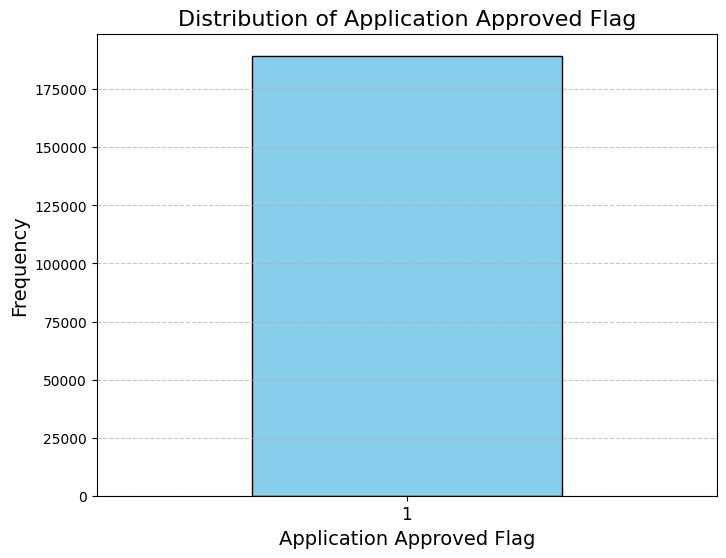

In [28]:
# Visualization: Distribution of 'application_approved_flag'
plt.figure(figsize=(8, 6))
data['application_approved_flag'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Application Approved Flag', fontsize=16)
plt.xlabel('Application Approved Flag', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

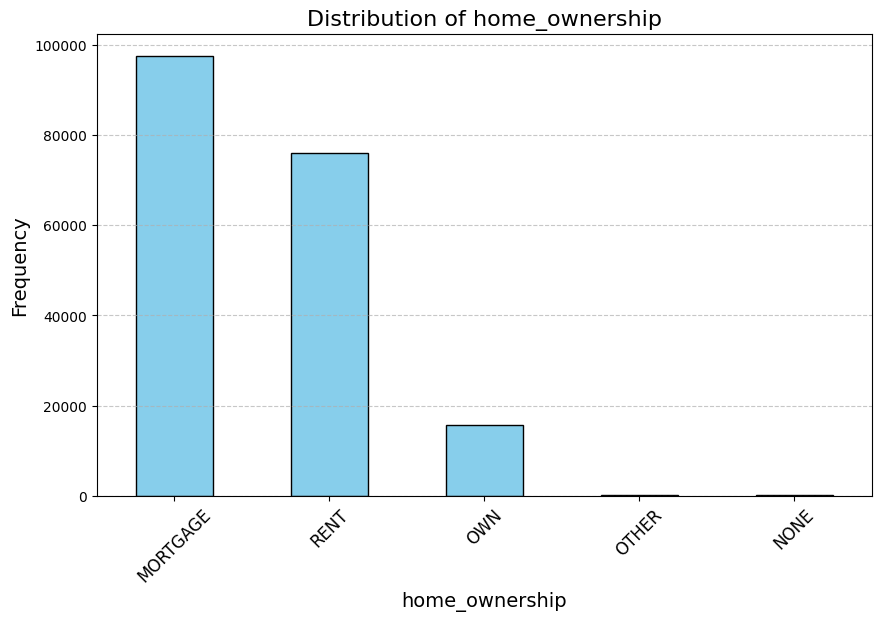

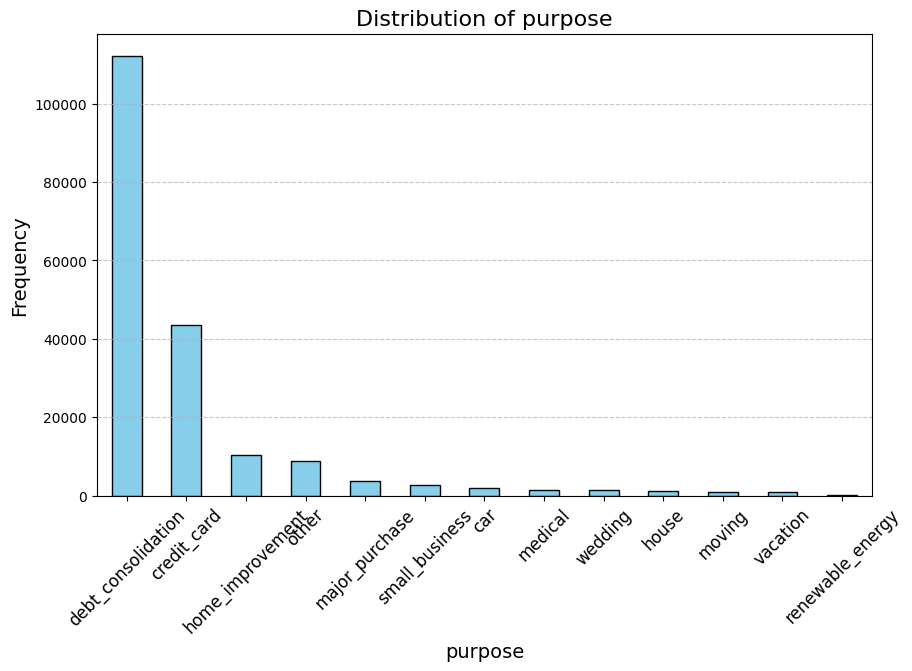

In [29]:
# Identify object-type columns
object_columns = ['home_ownership', 'purpose']

# Visualize each object-type column
for col in object_columns:
    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

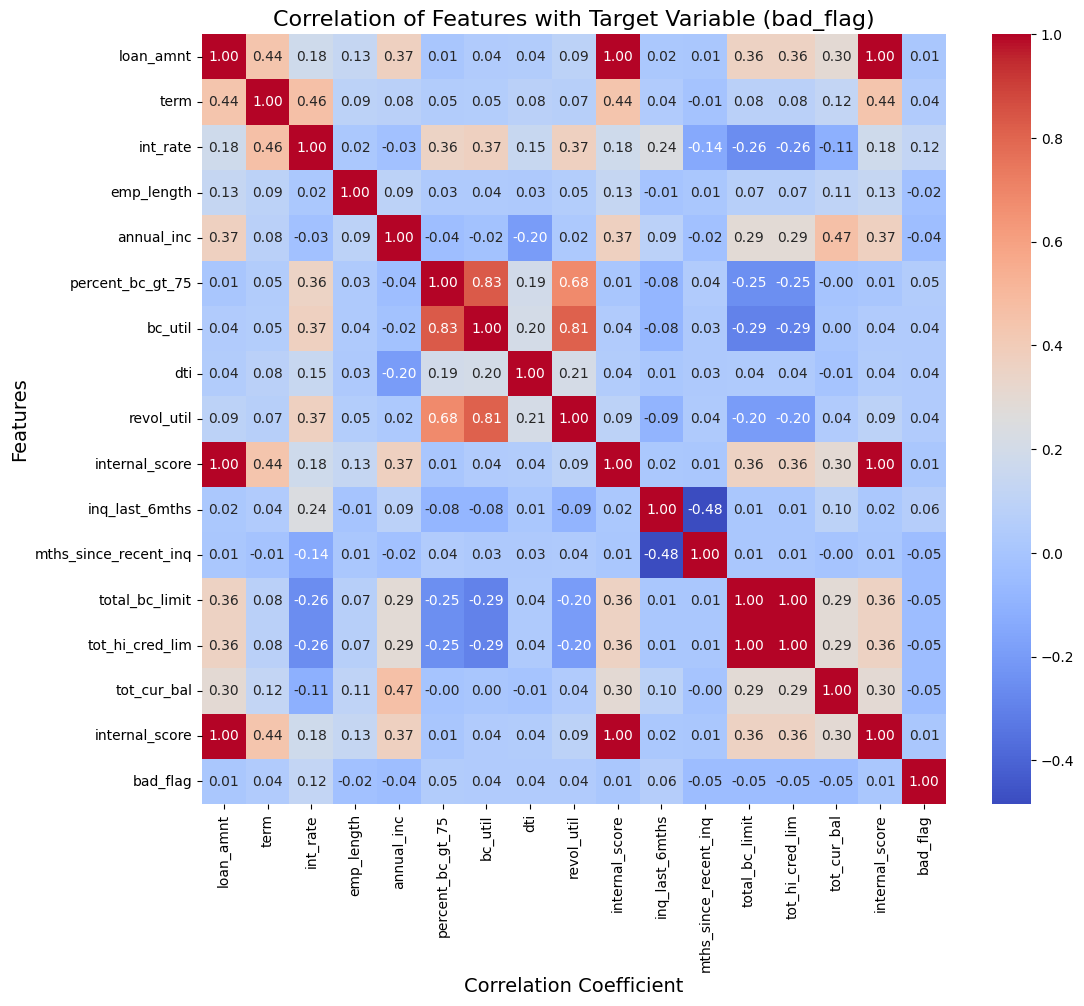

In [30]:
numerical_columns = ['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'percent_bc_gt_75', 'bc_util', 'dti', 'revol_util', 'internal_score',
                     'inq_last_6mths', 'mths_since_recent_inq', 'total_bc_limit', 'tot_hi_cred_lim', 'tot_cur_bal', 'internal_score', 'bad_flag']

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True, fmt=".2f", cmap='coolwarm', cbar=True
)
plt.title('Correlation of Features with Target Variable (bad_flag)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()